In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
airline = pd.read_excel("D:\ExcelR\Assigments\Forecasting\Airlines+Data.xlsx")
airline.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [5]:
airline.shape

(96, 2)

In [6]:
airline.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [7]:
airline.isna().sum()

Month         0
Passengers    0
dtype: int64

<AxesSubplot:>

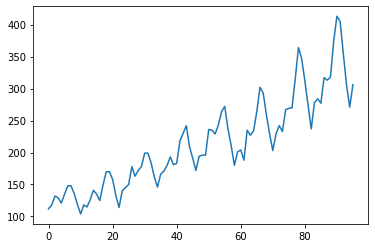

In [8]:
airline['Passengers'].plot()

<AxesSubplot:xlabel='Passengers', ylabel='Density'>

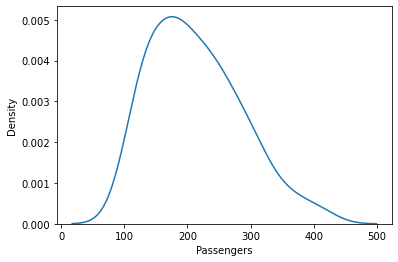

In [10]:
sns.distplot(airline['Passengers'], hist=False)

In [11]:
airline['month'] = airline['Month'].dt.strftime('%b')
airline.head()

,Month,Passengers,month
0,1995-01-01,112,Jan
1,1995-02-01,118,Feb
2,1995-03-01,132,Mar
3,1995-04-01,129,Apr
4,1995-05-01,121,May


In [12]:
dummies  = pd.DataFrame(pd.get_dummies(airline['month']))

In [13]:
airlines = pd.concat([airline,dummies],axis=1)

In [14]:
airlines.head()

,Month,Passengers,month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,0,0,0,0,0,0,0,0,1,0,0,0


In [15]:
airlines['year']=airlines['Month'].dt.strftime('%y')

In [16]:
airlines['t'] = np.arange(1,97)
airlines['t_sqr'] = airlines['t']*airlines['t']
airlines['log_passengers'] = np.log(airlines['Passengers'])
airlines.head()

,Month,Passengers,month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,year,t,t_sqr,log_passengers
0,1995-01-01,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0,95,1,1,4.718499
1,1995-02-01,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0,95,2,4,4.770685
2,1995-03-01,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0,95,3,9,4.882802
3,1995-04-01,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0,95,4,16,4.859812
4,1995-05-01,121,May,0,0,0,0,0,0,0,0,1,0,0,0,95,5,25,4.795791


<AxesSubplot:xlabel='month', ylabel='Passengers'>

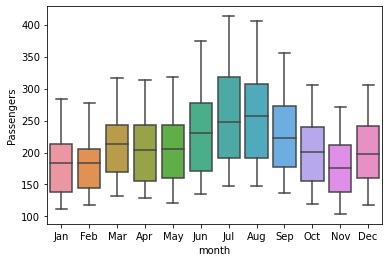

In [17]:
sns.boxplot(x="month",y="Passengers",data=airlines)

<AxesSubplot:xlabel='year', ylabel='Passengers'>

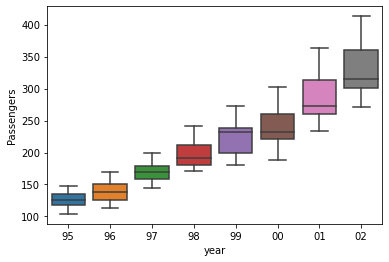

In [18]:
sns.boxplot(x="year",y="Passengers",data=airlines)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

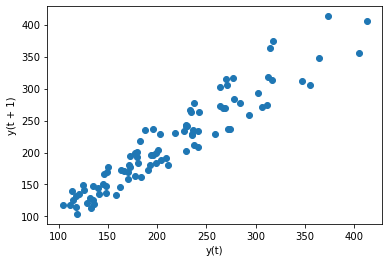

In [19]:
pd.plotting.lag_plot(airlines['Passengers'])

In [20]:
import statsmodels.graphics.tsaplots as tsa_plots

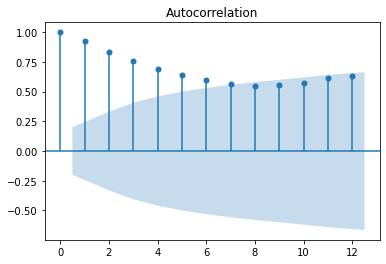

In [21]:
tsa_plots.plot_acf(airlines['Passengers'],lags=12)
plt.show()

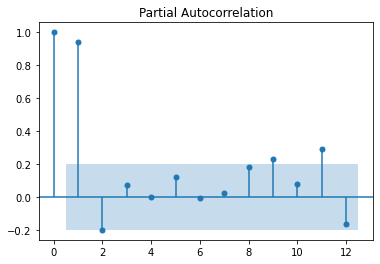

In [22]:
tsa_plots.plot_pacf(airlines['Passengers'],lags=12)
plt.show()

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

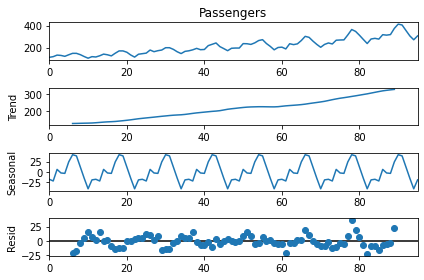

In [24]:
ts_decompose = seasonal_decompose(airlines['Passengers'],period = 12)
ts_decompose.plot()
plt.show()

In [26]:
train = airlines.head(75)
test = airlines.tail(25)

In [27]:
train.tail()

,Month,Passengers,month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,year,t,t_sqr,log_passengers
70,2000-11-01,203,Nov,0,0,0,0,0,0,0,0,0,1,0,0,00,71,5041,5.313206
71,2000-12-01,229,Dec,0,0,1,0,0,0,0,0,0,0,0,0,00,72,5184,5.433722
72,2001-01-01,242,Jan,0,0,0,0,1,0,0,0,0,0,0,0,01,73,5329,5.488938
73,2001-02-01,233,Feb,0,0,0,1,0,0,0,0,0,0,0,0,01,74,5476,5.451038
74,2001-03-01,267,Mar,0,0,0,0,0,0,0,1,0,0,0,0,01,75,5625,5.587249


In [28]:
test.head()

,Month,Passengers,month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,year,t,t_sqr,log_passengers
71,2000-12-01,229,Dec,0,0,1,0,0,0,0,0,0,0,0,0,00,72,5184,5.433722
72,2001-01-01,242,Jan,0,0,0,0,1,0,0,0,0,0,0,0,01,73,5329,5.488938
73,2001-02-01,233,Feb,0,0,0,1,0,0,0,0,0,0,0,0,01,74,5476,5.451038
74,2001-03-01,267,Mar,0,0,0,0,0,0,0,1,0,0,0,0,01,75,5625,5.587249
75,2001-04-01,269,Apr,1,0,0,0,0,0,0,0,0,0,0,0,01,76,5776,5.594711


# Model based forecasting

In [29]:
import statsmodels.formula.api as smf

### linear model

In [30]:
lnr_model = smf.ols('Passengers~t',data = train).fit()
pred_lnr = pd.Series(lnr_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_lnr))**2))
print('RMSE Linear:',rmse_linear)

RMSE Linear: 51.83809749584509


### Exponential model

In [32]:
exp_model = smf.ols('log_passengers~t',data = train).fit()
pred_exp = pd.Series(exp_model.predict(pd.DataFrame(test['t'])))
rmse_exponential = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_exp)))**2))
print('RMSE exponential:',rmse_exponential)

RMSE exponential: 42.77525975019812


### Quadratic model

In [34]:
qd_model = smf.ols('Passengers~t+t_sqr',data=train).fit()
pred_qd =  pd.Series(qd_model.predict(pd.DataFrame(test[['t','t_sqr']])))
rmse_quadratic = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_qd))**2))
print("RMSE Quadratic: ",rmse_quadratic)

RMSE Quadratic:  54.03140645625426


### Additive seasonality

In [36]:
add_sea_model = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
pred_add_sea =  pd.Series(add_sea_model.predict(pd.DataFrame(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])))
rmse_additive_seasonality = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea))**2))
print("RMSE Additive seasonality: ",rmse_additive_seasonality)

RMSE Additive seasonality:  123.02763788084239


### Additive seasonality quadratic

In [38]:
add_sea_qd_model = smf.ols('Passengers~t+t_sqr+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
pred_add_sea_qd =  pd.Series(add_sea_qd_model.predict(pd.DataFrame(test[['t','t_sqr','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])))
rmse_additive_seasonality_quadratic = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea_qd))**2))
print("RMSE Additive seasonality quadratic: ",rmse_additive_seasonality_quadratic)

RMSE Additive seasonality quadratic:  36.53627444546715


### Multiplicative seasonalty

In [40]:
mult_sea_model = smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
pred_mult_sea =  pd.Series(mult_sea_model.predict(test))
rmse_multiplicative_seasonality = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_mult_sea)))**2))
print("RMSE Multiplicative seasonality: ",rmse_multiplicative_seasonality)

RMSE Multiplicative seasonality:  128.16622817596132


### Multiplicative additive seasonality

In [41]:
mult_add_sea_model = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
pred_mult_add_sea =  pd.Series(mult_add_sea_model.predict(test))
rmse_multiplicative_add_sea = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_mult_add_sea)))**2))
print("RMSE Multiplicative additive seasonality: ",rmse_multiplicative_add_sea)

RMSE Multiplicative additive seasonality:  11.565825437686438


# Data driven forecasting

### Moving average

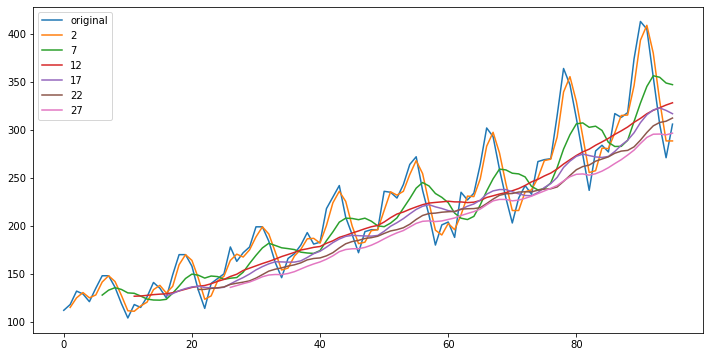

In [43]:
plt.figure(figsize=(12,6))
airlines['Passengers'].plot(label='original')
for i in range(2,30,5):
    airlines['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best') 

### Simple exponential smoothing model

In [44]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,Holt,Holt,ExponentialSmoothing

In [45]:
ses_model = SimpleExpSmoothing(train['Passengers']).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start=test.index[0],end=test.index[-1])
ses_rmse = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_ses))**2))
ses_rmse

77.71310757780823

### Holt model

In [46]:
holt_model = Holt(train['Passengers']).fit(smoothing_level=0.8,smoothing_slope=0.2)
pred_holt = holt_model.predict(start=test.index[0],end=test.index[-1])
holt_rmse = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_holt))**2))
holt_rmse

42.88281154093866

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [47]:
hwe_model_m_a = ExponentialSmoothing(train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_m_a = hwe_model_m_a.predict(start = test.index[0],end = test.index[-1])

hw_ma_rms=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_hwe_m_a))**2))
hw_ma_rms

35.70793244836327

### Holts winter exponential smoothing with additive seasonality and multiplicative trend

In [48]:
hwe_model_a_m = ExponentialSmoothing(train["Passengers"],seasonal="add",trend="mul",seasonal_periods=12).fit() 
pred_hwe_a_m = hwe_model_a_m.predict(start = test.index[0],end = test.index[-1])

hw_am_rms=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_hwe_a_m))**2))
hw_am_rms

35.779433704901

### Holts winter exponential smoothing with additive seasonality and additive trend

In [49]:
hwe_model_a_a = ExponentialSmoothing(train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() 
pred_hwe_a_a = hwe_model_a_a.predict(start = test.index[0],end = test.index[-1])

hw_aa_rms=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_hwe_a_a))**2))
hw_aa_rms

40.85787305184345

In [50]:
from statsmodels.tsa.arima_model import ARIMA,ARMA

### ARMA model

In [51]:
ARMA_model = ARMA(train['Passengers'],order=(3,0)).fit()
pred_arma = ARMA_model.predict(start = test.index[0],end = test.index[-1])

arma_rmse=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_arma))**2))
arma_rmse

95.17908384409978

### ARIMA model

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

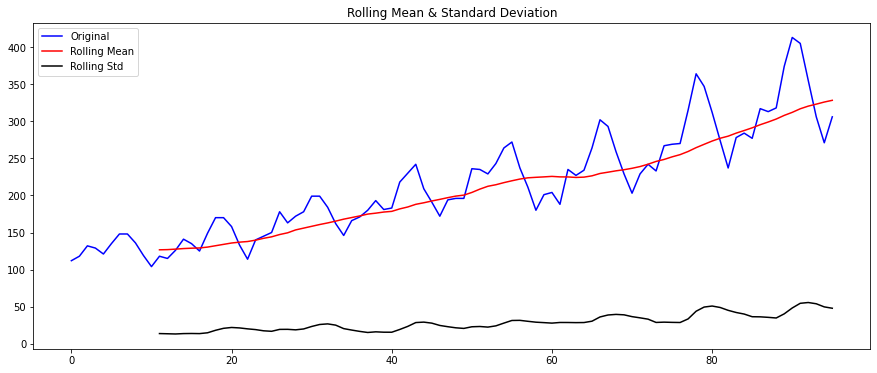

In [52]:
plt.figure(figsize=(15,6))
rollingmean=airlines['Passengers'].rolling(12).mean()
rollingstd=airlines['Passengers'].rolling(12).std()
plt.plot(airlines['Passengers'], color='blue',label='Original')
plt.plot(rollingmean, color='red', label='Rolling Mean')
plt.plot(rollingstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')

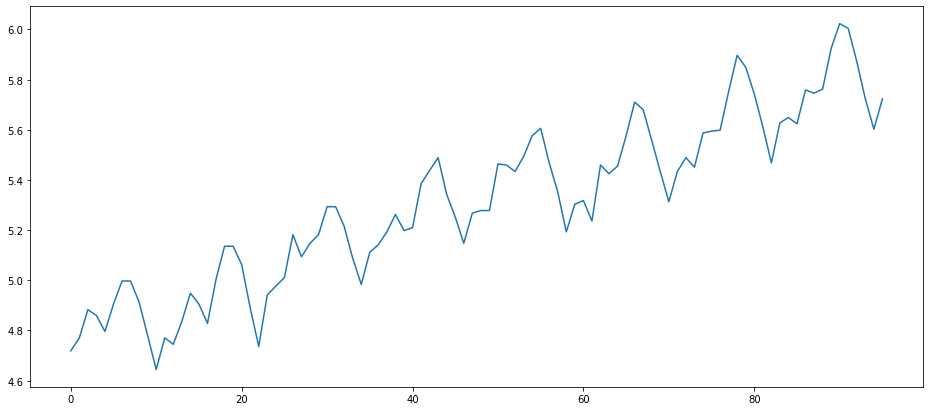

In [53]:
plt.figure(figsize=(16,7))
ts_log = np.log(airlines['Passengers'])
plt.plot(ts_log)

#### -differencing

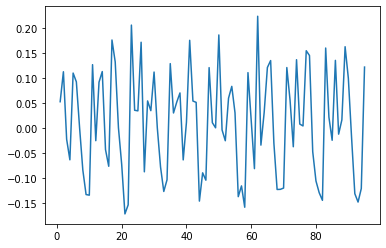

In [54]:
ts_log_diff = ts_log - ts_log.shift(periods=1)
plt.plot(ts_log_diff)

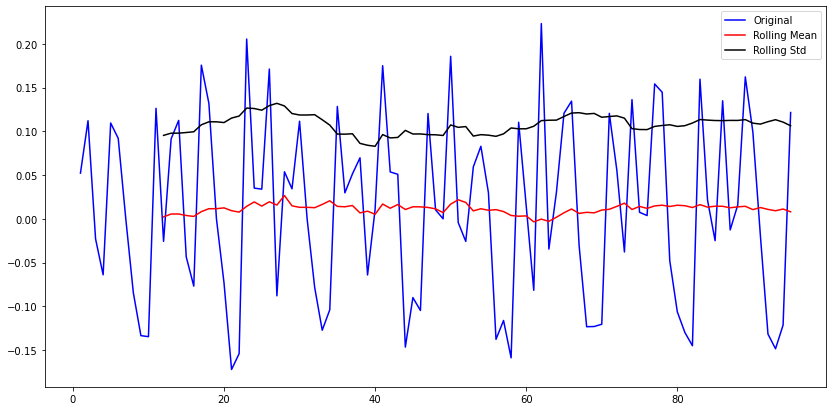

In [55]:
plt.figure(figsize=(14,7))
rollingmean = ts_log_diff.rolling(12).mean()
rollingstd = ts_log_diff.rolling(12).std()
plt.plot(ts_log_diff, color='blue',label='Original')
plt.plot(rollingmean, color='red', label='Rolling Mean')
plt.plot(rollingstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')

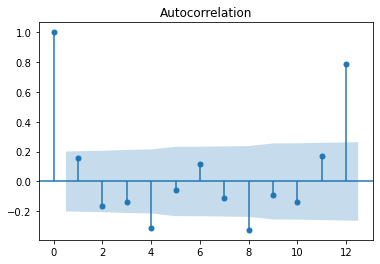

In [56]:
tsa_plots.plot_acf(ts_log_diff.dropna(),lags=12)
plt.show()

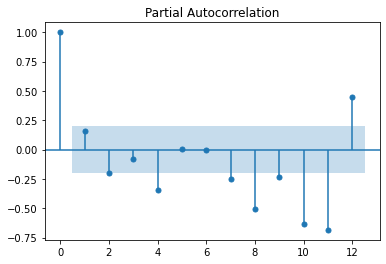

In [57]:
tsa_plots.plot_pacf(ts_log_diff.dropna(),lags=12)
plt.show()

In [58]:
import itertools

In [59]:
p =range(0,5)
d =range(0,5)
q =range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [62]:
for params in pdq:
    try:
        arima_model = ARIMA(airlines['Passengers'],order=params).fit()
        print(params,arima_model.aic)
    except:
        continue

(0, 0, 0) 1096.3326344079978
(0, 0, 1) 987.8934076553439
(0, 0, 4) 904.7907028817497
(0, 1, 0) 871.3452137845559
(0, 1, 1) 863.757408461121
(0, 1, 2) 861.7727220874613
(0, 1, 3) 850.5607168850627
(0, 1, 4) 840.719978612206
(0, 2, 0) 900.3138224553907
(0, 2, 1) 869.7586216494109
(0, 2, 2) 861.6151235170526
(0, 2, 3) 860.3326116981864
(0, 2, 4) 850.771321373196
(1, 0, 0) 883.6612498869068
(1, 0, 1) 874.2088502284947
(1, 0, 2) 874.3369608960484
(1, 0, 3) 1663.460800614184
(1, 0, 4) 1516.4323591600587
(1, 1, 0) 867.2830878043214
(1, 1, 1) 863.6267472436728
(1, 1, 2) 845.8169652918516
(1, 1, 3) 847.7744709882365
(1, 1, 4) 842.7041753371352
(1, 2, 0) 898.0216409678881
(1, 2, 2) 860.3329772569505
(1, 2, 3) 861.45624305544
(1, 2, 4) 862.8541801287798
(2, 0, 0) 877.7040838074082
(2, 0, 1) 873.7617886793985
(2, 0, 2) 895.4102639397931
(2, 0, 3) 891.3845726756911
(2, 0, 4) 926.6332636823013
(2, 1, 0) 863.3957032717742
(2, 1, 1) 843.2314466517291
(2, 1, 2) 835.9525580818722
(2, 1, 3) 836.618038314

#### (4,2,3) gives least aic value

In [63]:
ARIMA_model = ARIMA(train['Passengers'],order=(4,2,1)).fit()
pred_arima = ARIMA_model.predict(start = test.index[0],end = test.index[-1])

arima_rmse = np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_arima))**2))
arima_rmse

307.2100833136122

In [64]:
table = {'Model':pd.Series(['Linear','Exponential','Quadratic','Additive Seasonality','Add_Sea_Quadratic','Multiplicative Sea','Multplicative_Add_Sea','SES','Holt','HWE_Mul_Add','HWE_Add_Mul','HWE_Add_Add','ARMA','ARIMA']),
        'RMSE_values':pd.Series([rmse_linear,rmse_exponential,rmse_quadratic,rmse_additive_seasonality,rmse_additive_seasonality_quadratic,rmse_multiplicative_seasonality,rmse_multiplicative_add_sea,ses_rmse,holt_rmse,hw_ma_rms,hw_am_rms,hw_aa_rms,arma_rmse,arima_rmse])}
table1 = pd.DataFrame(table)
table1

,Model,RMSE_values
0,Linear,51.838097
1,Exponential,42.775260
2,Quadratic,54.031406
3,Additive Seasonality,123.027638
4,Add_Sea_Quadratic,36.536274
5,Multiplicative Sea,128.166228
6,Multplicative_Add_Sea,11.565825
7,SES,77.713108
8,Holt,42.882812
9,HWE_Mul_Add,35.707932
